1. Making Classification data and getting it ready

In [536]:
import sklearn

In [537]:
from sklearn.datasets import make_circles

# Making 1000 smaples
n_samples = 1000

# creating circles
X, Y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)


In [538]:
len(X), len(Y)

(1000, 1000)

In [539]:
print(f"First 10 samples of X: \n {X[:10]}")
print(f"First 10 samples of Y: \n {Y[:10]}")

First 10 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]
First 10 samples of Y: 
 [1 1 1 1 0 1 1 1 1 0]


In [540]:
# Make the Dataframe of the circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2":X[:, 1],
                        "labels": Y
                        })
circles.head(10)

,X1,X2,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [541]:
circles.labels.value_counts()

labels
1    500
0    500
Name: count, dtype: int64

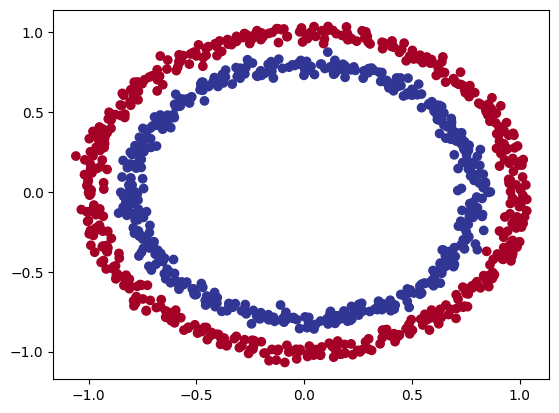

In [542]:
# Making the plot of the data
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=Y,
            cmap=plt.cm.RdYlBu)

1.1 Checking the input and output shapes

In [543]:
print(f"Shape of X:{X.shape}")
print(f"Shape of Y:{Y.shape}")

Shape of X:(1000, 2)
Shape of Y:(1000,)


In [544]:
# Viewing the first example of features and labels and their shapes

X_sample = X[0]
Y_sample = Y[0]

print(f"The first sample of X: {X_sample}, and first sample of Y: {Y_sample}")
print(f"The first sample X shape: {X_sample.shape}, and first sample Y shape: {Y_sample.shape}")

The first sample of X: [0.75424625 0.23148074], and first sample of Y: 1
The first sample X shape: (2,), and first sample Y shape: ()


1.2 Turingin the data into tensor and spliting into train and test splits.

In [545]:
import torch
torch.__version__

'2.3.1+cu121'

In [546]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [547]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

In [548]:
X[0],Y[0] 

(tensor([0.7542, 0.2315]), tensor(1.))

In [549]:
# Spliting the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                X, 
                                                Y, 
                                                test_size=0.2,
                                                random_state=42)

In [550]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

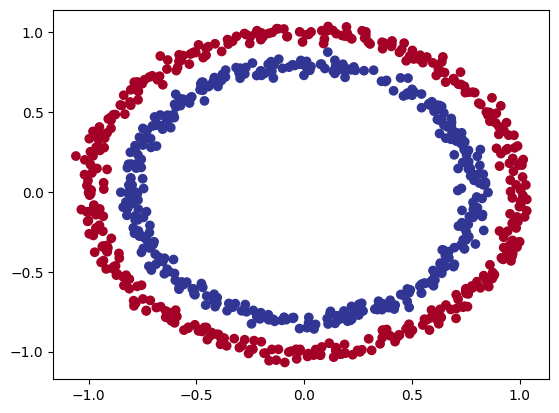

In [551]:
# Plotting the training set
plt.scatter(x=X_train[:, 0],
            y=X_train[:, 1],
            c=y_train,
            cmap=plt.cm.RdYlBu)
plt.show()

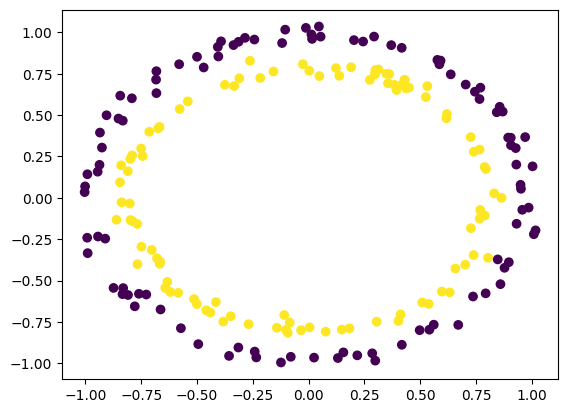

In [552]:
# Plotting the testing set
plt.scatter(x=X_test[:, 0],
            y=X_test[:, 1],
            c=y_test,
            cmap=plt.cm.viridis)

plt.show()

2. Creating and Training/Testing of the model

2.1 Creating the Model

In [553]:
# Import Pytorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [554]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [555]:
# Constructing a model that subclasses nn.Module

class CircleModevV1(nn.Module):
    def __init__(self):
        super().__init__()
        # Creating the two nn.Linear for handling the shape of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
        
    def forward(self,x):
        return self.layer_2(self.layer_1(x)) # X -> layer_1 -> layer_2 -> output

# Instantiate an instance of model class and send it to device
model_0 = CircleModevV1().to(device)
model_0

CircleModevV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [556]:
device

'cuda'

In [557]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [558]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [559]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5293,  0.6441],
                      [-0.5190,  0.3779],
                      [ 0.2485,  0.2298],
                      [-0.3823,  0.6427],
                      [ 0.1554,  0.0910]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6231,  0.2968, -0.1061, -0.3239,  0.6074], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0997, -0.2474, -0.2264, -0.0214,  0.2497]], device='cuda:0')),
             ('1.bias', tensor([-0.1143], device='cuda:0'))])

In [560]:
# mAking the prediction on the model
model_0.eval()
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
    print(f"Length of prediction: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
    print(f"Length of the test sample: {len(X_test)}, Shape: {X_test.shape}")
    print(f"Length of the test label sample: {len(y_test)}, Shape: {y_test.shape}")
    print(f"\nFirst 10 predictions: {untrained_preds[:10]}")
    print(f"\nFirst 10 labels: {y_test[:10]}")

Length of prediction: 200, Shape: torch.Size([200, 1])
Length of the test sample: 200, Shape: torch.Size([200, 2])
Length of the test label sample: 200, Shape: torch.Size([200])

First 10 predictions: tensor([[-0.1415],
        [-0.1357],
        [-0.0911],
        [-0.1561],
        [ 0.0132],
        [ 0.0160],
        [-0.0502],
        [-0.0144],
        [-0.0956],
        [-0.1341]], device='cuda:0')

First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [561]:
## Setting up the loss function and optimizer 

# We are using the BCEWithLogitsLoss for our loss function

# This loss function has sigmoid actication function built in
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(
                        params=model_0.parameters(), 
                        lr=0.01)

In [562]:
# Moving the train and test data/tensor from cpu(defgault) to device(cuda)

X_train = X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

X_train[0], y_train[0], X_test[0], y_test[0]

(tensor([ 0.6579, -0.4651], device='cuda:0'),
 tensor(1., device='cuda:0'),
 tensor([-0.3752,  0.6827], device='cuda:0'),
 tensor(1., device='cuda:0'))

2.3 Creating the Model evalutaion metrices

In [563]:
# Calculating the accuracy - out of 100 examples, what % is our model accurate
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return f"{acc:.2f} %"

2.4 Converting the raw logits -> prediction probabilities -> prediction labels

In [564]:
# Viewing the first 5 output of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1415],
        [-0.1357],
        [-0.0911],
        [-0.1561],
        [ 0.0132]], device='cuda:0')

In [565]:
# Using the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4647],
        [0.4661],
        [0.4772],
        [0.4611],
        [0.5033]], device='cuda:0')

The torch.round here is rounding out the pred_probs into nearest integers
- `y_pred_probs` >= 0.5 `y=1` (class 1)
- `y_pred_probs` <= 0.5 `y=0` (class 0)


In [566]:
# Finding the predicted labels
# y_pred here is round of sigmoid of (y_logits)
# y_logits is just the output of the model (forward_pass() output)

y_preds = torch.round(y_pred_probs) 
print(f"Y Prediciton :{y_preds}, Shape: {y_preds.shape}")

# The complete code
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(f"Y Prediciton Labels :{y_preds_labels}, Shape: {y_preds_labels.shape}")

# Checking for the equality
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

# Getting rid of the extra dimension from y_preds
y_preds.squeeze()

Y Prediciton :tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]], device='cuda:0'), Shape: torch.Size([5, 1])
Y Prediciton Labels :tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>), Shape: torch.Size([5, 1])
tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 1.], device='cuda:0')

In [567]:
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

In [568]:
model_0 = CircleModevV1()
model_0.to(device)

CircleModevV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

2.5 Training/Testing of the Model

In [569]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train = X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

# Creating the training and testing loop

epochs = 100
epoch_count = []
train_loss_list = []
test_loss_list = []

for epoch in range(epochs):
    
    # 1. Setting up the model in training mode
    model_0.train()
    
    # 2. Forward passing the train_data
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # 3. Calculating the loss/accuracy
    # train_loss = loss_fn(torch.sigmoid(y_logits)) # if loss fn is nn.BCELoss excepts prediction probabilities as inputs
    train_loss = loss_fn(y_pred, y_train) # nn.BCEWithLogitsLoss excepts raw logits as inputs
    train_acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    # 4. Initizialing the optimizer zero grad
    optimizer.zero_grad()
    
    # 5. Performing the backkward propgation
    train_loss.backward()
    
    # 6. Step the optmizer (Gradient Descent)
    optimizer.step()
    
    ## Testing the model
    
    # 1. Setting up the model for testing
    model_0.eval()
    
    # 2. Creating the infernce context
    with torch.inference_mode():
        
        # 2.1. Forward Pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # 2.2. Calculating the loss/accuracy
        test_loss = loss_fn(test_pred, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        
    if epoch % 10 ==0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc}")
        epoch_count.append(epoch)
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        
        # print(f"\n Model Dict: {model_0.state_dict()}")


Epoch: 0 | Train Loss: 0.69315 | Train Accuracy: 50.00 % | Test Loss: 0.69315 | Test Accuracy: 50.00 %
Epoch: 10 | Train Loss: 0.69315 | Train Accuracy: 50.00 % | Test Loss: 0.69315 | Test Accuracy: 50.00 %
Epoch: 20 | Train Loss: 0.69315 | Train Accuracy: 50.00 % | Test Loss: 0.69315 | Test Accuracy: 50.00 %
Epoch: 30 | Train Loss: 0.69315 | Train Accuracy: 50.00 % | Test Loss: 0.69315 | Test Accuracy: 50.00 %
Epoch: 40 | Train Loss: 0.69315 | Train Accuracy: 50.00 % | Test Loss: 0.69315 | Test Accuracy: 50.00 %
Epoch: 50 | Train Loss: 0.69315 | Train Accuracy: 50.00 % | Test Loss: 0.69315 | Test Accuracy: 50.00 %
Epoch: 60 | Train Loss: 0.69315 | Train Accuracy: 50.00 % | Test Loss: 0.69315 | Test Accuracy: 50.00 %
Epoch: 70 | Train Loss: 0.69315 | Train Accuracy: 50.00 % | Test Loss: 0.69315 | Test Accuracy: 50.00 %
Epoch: 80 | Train Loss: 0.69315 | Train Accuracy: 50.00 % | Test Loss: 0.69315 | Test Accuracy: 50.00 %
Epoch: 90 | Train Loss: 0.69315 | Train Accuracy: 50.00 % | Test 

3. Make predicitons and evaluate the model

In [570]:
import requests
from pathlib import Path

In [571]:
if Path("helper_functions.py").is_file():
    print("helper function alreay exist, skipping the download.")
else:
    print("Downloading the helper function file.")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open ("helper_functions.py", "wb") as f:
        f.write(request.content)

helper function alreay exist, skipping the download.


In [572]:
from helper_functions import plot_predictions, plot_decision_boundary

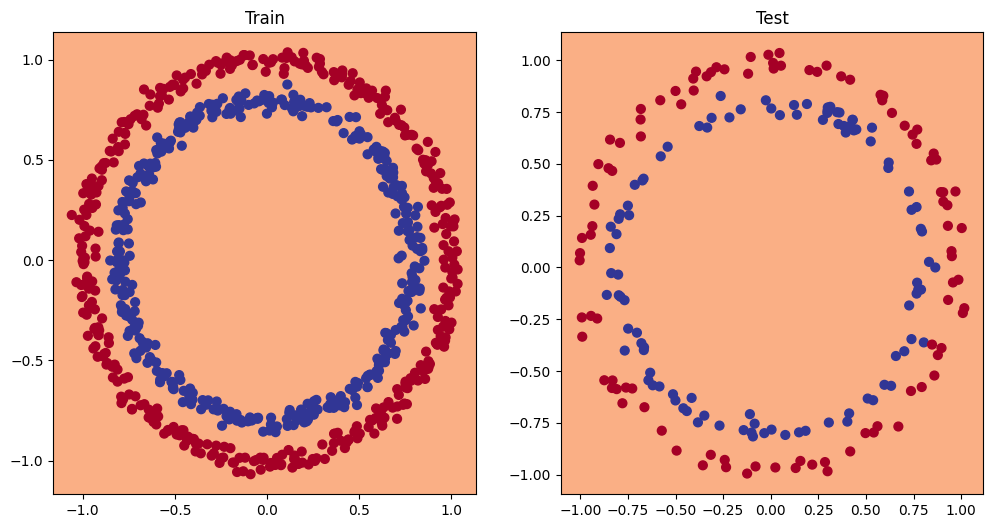

In [573]:
from helper_functions import plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

4. Improving the model (from a model prespective)

In [574]:
class CircleModevV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    
    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        
        # This type of writing the operations will speed up the operations if possible
        return self.layer_3(self.layer_2(self.layer_1(x)))

In [575]:
# instantiating the above defined new model
model_1 = CircleModevV2().to(device)
model_1

CircleModevV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [576]:
# Creating the new loss_fn and optmizer for the updated model
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
                        params=model_1.parameters(), 
                        lr=0.1)

In [577]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [578]:
# Put the training ans testing data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000
epoch_count = []
train_loss_list = []
test_loss_list = []

for epoch in range(epochs):
    
    ### Training
    model_1.train()
    
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # 2. Calculate the loss/accuracy
    train_loss = loss_fn(y_logits, y_train)
    train_acc = accuracy_fn(y_true=y_train,
                            y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss Backward (backpropagation)
    train_loss.backward()
    
    # 5. Optimizer step (Gradient Descent)
    optimizer.step()
    
    ### Testing
    
    model_1.eval()
    
    with torch.inference_mode():
        y_test_logits = model_1(X_test).squeeze()
        y_test_pred = torch.round(torch.sigmoid(y_test_logits))
        
        # 1. Calculate the loss/accuracy
        
        test_loss = loss_fn(y_test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, 
                                y_pred=y_test_pred)
        
    if epoch % 10 ==0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc}")
        epoch_count.append(epoch)
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        

Epoch: 0 | Train Loss: 0.69396 | Train Accuracy: 50.88 % | Test Loss: 0.69261 | Test Accuracy: 51.00 %
Epoch: 10 | Train Loss: 0.69369 | Train Accuracy: 50.25 % | Test Loss: 0.69270 | Test Accuracy: 50.00 %
Epoch: 20 | Train Loss: 0.69351 | Train Accuracy: 50.12 % | Test Loss: 0.69283 | Test Accuracy: 49.50 %
Epoch: 30 | Train Loss: 0.69339 | Train Accuracy: 50.50 % | Test Loss: 0.69297 | Test Accuracy: 48.00 %
Epoch: 40 | Train Loss: 0.69329 | Train Accuracy: 50.38 % | Test Loss: 0.69310 | Test Accuracy: 49.00 %
Epoch: 50 | Train Loss: 0.69322 | Train Accuracy: 49.88 % | Test Loss: 0.69324 | Test Accuracy: 50.00 %
Epoch: 60 | Train Loss: 0.69317 | Train Accuracy: 49.38 % | Test Loss: 0.69336 | Test Accuracy: 51.50 %
Epoch: 70 | Train Loss: 0.69312 | Train Accuracy: 49.38 % | Test Loss: 0.69348 | Test Accuracy: 50.50 %
Epoch: 80 | Train Loss: 0.69309 | Train Accuracy: 50.12 % | Test Loss: 0.69359 | Test Accuracy: 50.00 %
Epoch: 90 | Train Loss: 0.69307 | Train Accuracy: 50.50 % | Test 

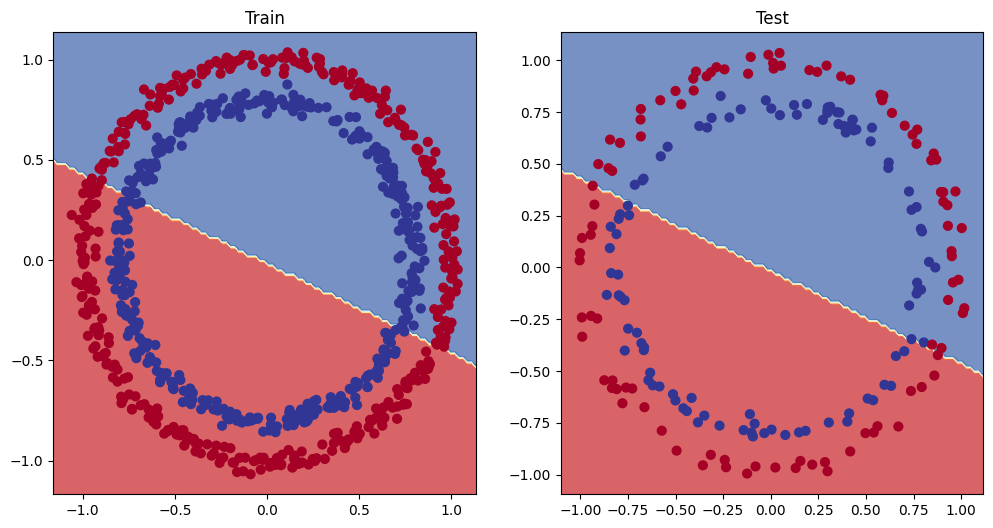

In [579]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

5. Testing if our model can fit staright line

In [580]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Creating data for straight line
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Checking the data
print(len(X_regression))
X_regression[:5],X_regression.shape, y_regression[:5], y_regression.shape

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 torch.Size([100, 1]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]),
 torch.Size([100, 1]))

In [581]:
# Creating the train/test split of th data
train_split = int( 0.8* len(X_regression))

X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression),len(X_test_regression), len(y_train_regression),  len(y_test_regression)

(80, 20, 80, 20)

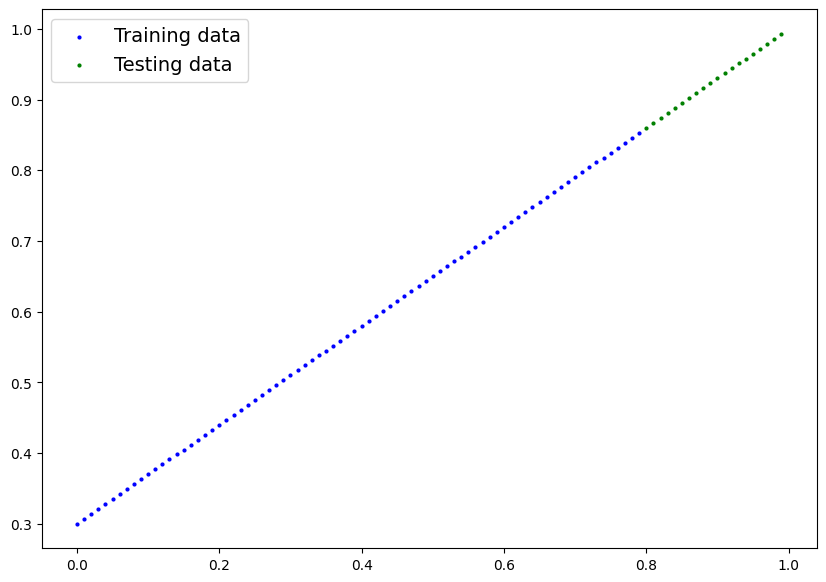

In [582]:
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression, test_data=X_test_regression, test_labels=y_test_regression)

5.2 Adjusting the `model_1` to fit the straight line

In [583]:
# Same architecture as model_1 (but using the nn.Sequential())

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [584]:
# Setting up the loss and accuracy
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(
                        params=model_2.parameters(),
                        lr= 0.01)


In [585]:
# Train the model 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Putting the data in target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
    model_2.train()
    y_pred = model_2(X_train_regression)
    
    train_loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    
    train_loss.backward()
    optimizer.step()
    
    # Testing
    model_2.eval()
    with torch.inference_mode():
        y_test_pred = model_2(X_test_regression)
        test_loss = loss_fn(y_test_pred, y_test_regression)
        
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.3f} | Test Loss:{test_loss:.3f}")

Epoch: 0 | Train Loss: 0.760 | Test Loss:0.911
Epoch: 10 | Train Loss: 0.402 | Test Loss:0.505
Epoch: 20 | Train Loss: 0.060 | Test Loss:0.102
Epoch: 30 | Train Loss: 0.016 | Test Loss:0.032
Epoch: 40 | Train Loss: 0.031 | Test Loss:0.001
Epoch: 50 | Train Loss: 0.032 | Test Loss:0.001
Epoch: 60 | Train Loss: 0.032 | Test Loss:0.002
Epoch: 70 | Train Loss: 0.031 | Test Loss:0.001
Epoch: 80 | Train Loss: 0.031 | Test Loss:0.001
Epoch: 90 | Train Loss: 0.030 | Test Loss:0.001
Epoch: 100 | Train Loss: 0.029 | Test Loss:0.001
Epoch: 110 | Train Loss: 0.030 | Test Loss:0.002
Epoch: 120 | Train Loss: 0.027 | Test Loss:0.001
Epoch: 130 | Train Loss: 0.029 | Test Loss:0.002
Epoch: 140 | Train Loss: 0.029 | Test Loss:0.002
Epoch: 150 | Train Loss: 0.027 | Test Loss:0.002
Epoch: 160 | Train Loss: 0.026 | Test Loss:0.001
Epoch: 170 | Train Loss: 0.026 | Test Loss:0.002
Epoch: 180 | Train Loss: 0.025 | Test Loss:0.001
Epoch: 190 | Train Loss: 0.026 | Test Loss:0.003
Epoch: 200 | Train Loss: 0.025 

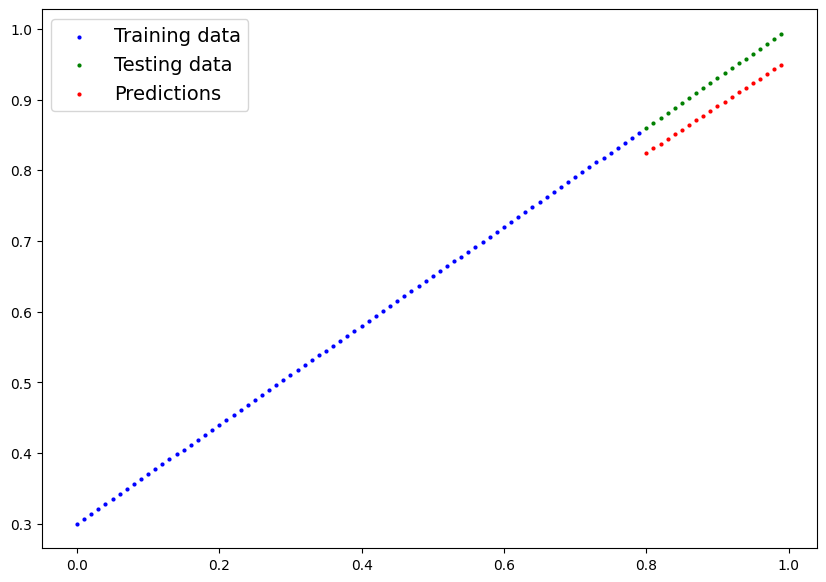

In [586]:
# Plotting the prediciton in plot
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(), train_labels=y_train_regression.cpu(), test_data=X_test_regression.cpu(), test_labels=y_test_regression.cpu(), predictions=y_preds.cpu())

6. The Missing piece: non-linearity

6.1 Recreating the non-linear data (red and blue circles)

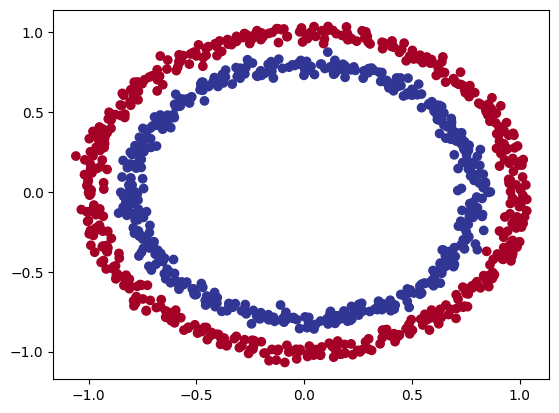

In [587]:
# Making the data and plotting it
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


In [588]:
# Convert the data to tensor and splitting the test/train dataset
import torch
from sklearn.model_selection import train_test_split

# Turn the data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [589]:
# Checking out the shape of the train/test data
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, \ny_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: torch.Size([800, 2]), X_test shape: torch.Size([200, 2]), 
y_train shape: torch.Size([800]), y_test shape: torch.Size([200])


In [590]:
X_train[:5], y_train[:5]

(tensor([[ 0.6368,  0.7459],
         [-0.5127,  0.8748],
         [-0.9722, -0.3776],
         [-0.4346, -0.9003],
         [-0.7692, -0.2441]]),
 tensor([0., 0., 0., 0., 1.]))

6.2 Creating the model with the non-linear layer added

In [591]:
from torch import nn

class CircleModevV3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [592]:
model_3 = CircleModevV3()
model_3.to(device)

CircleModevV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [593]:
# Putting the train/test data into the target device 
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

In [594]:
# Creating the optimizer and loss function
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(
                        params=model_3.parameters(),
                        lr=0.1)


In [595]:
# Now training and testing the new model_3 which has the non-linear layers
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 2000
epoch_count = []
train_loss_list = []
test_loss_list = []
train_acc = []
test_acc = []

for epoch in range(epochs):
    
    # 1. Setting up the model for training
    model_3.train()
    
    # 2. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # 3. Loss and accuracy 
    train_loss = loss_fn(y_logits, y_train)
    train_acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    # 4. Optmizer zero grad
    optimizer.zero_grad()
    
    # 5. Loss backward (back propagation)
    train_loss.backward()
    
    # 6. Optmizer step (gradient descent)
    optimizer.step()
    
    ### Testing the model
    model_3.eval()
    with torch.inference_mode():
        y_test_logits = model_3(X_test).squeeze()
        y_test_pred = torch.round(torch.sigmoid(y_test_logits))
        
        test_loss = loss_fn(y_test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred= y_test_pred)
        
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc}")
        epoch_count.append(epoch)
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)

Epoch: 0 | Train Loss: 0.69273 | Train Accuracy: 50.62 % | Test Loss: 0.69407 | Test Accuracy: 47.50 %
Epoch: 10 | Train Loss: 0.69222 | Train Accuracy: 50.62 % | Test Loss: 0.69368 | Test Accuracy: 47.50 %
Epoch: 20 | Train Loss: 0.69197 | Train Accuracy: 50.62 % | Test Loss: 0.69350 | Test Accuracy: 47.50 %
Epoch: 30 | Train Loss: 0.69178 | Train Accuracy: 50.62 % | Test Loss: 0.69340 | Test Accuracy: 47.50 %
Epoch: 40 | Train Loss: 0.69160 | Train Accuracy: 51.00 % | Test Loss: 0.69330 | Test Accuracy: 48.00 %
Epoch: 50 | Train Loss: 0.69141 | Train Accuracy: 52.88 % | Test Loss: 0.69321 | Test Accuracy: 48.50 %
Epoch: 60 | Train Loss: 0.69124 | Train Accuracy: 54.37 % | Test Loss: 0.69313 | Test Accuracy: 50.00 %
Epoch: 70 | Train Loss: 0.69106 | Train Accuracy: 56.00 % | Test Loss: 0.69305 | Test Accuracy: 51.50 %
Epoch: 80 | Train Loss: 0.69087 | Train Accuracy: 57.38 % | Test Loss: 0.69298 | Test Accuracy: 52.50 %
Epoch: 90 | Train Loss: 0.69069 | Train Accuracy: 63.75 % | Test 

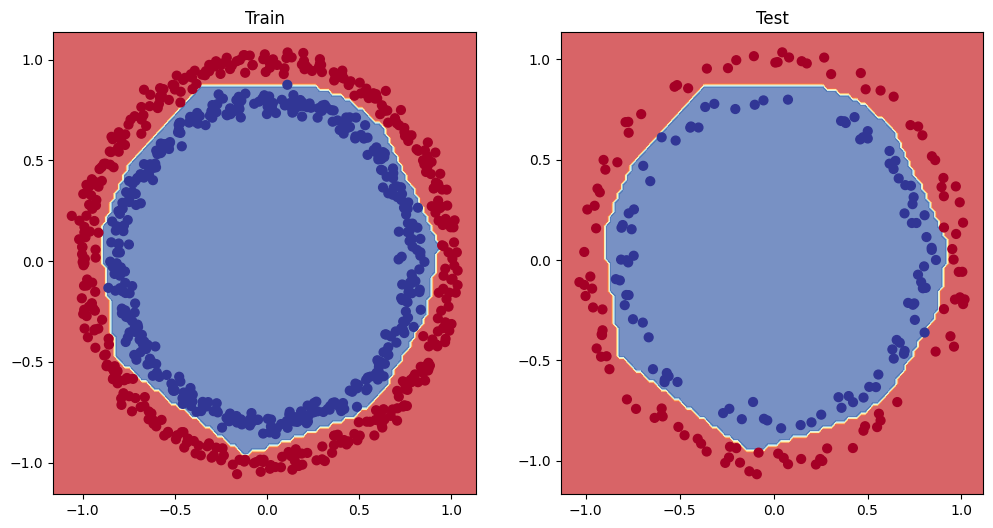

In [596]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

7. Replicating non-linear activation functions

In [597]:
# Creating a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

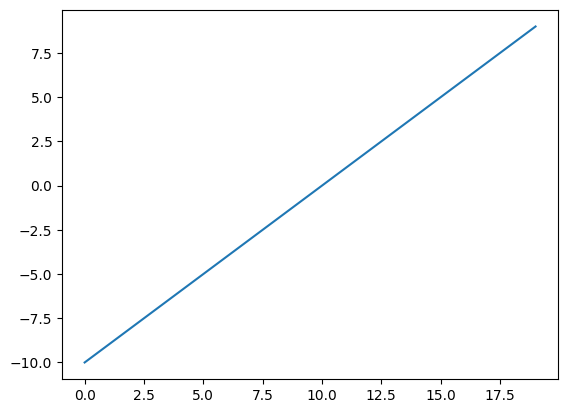

In [598]:
# Visualize the tensor
plt.plot(A)

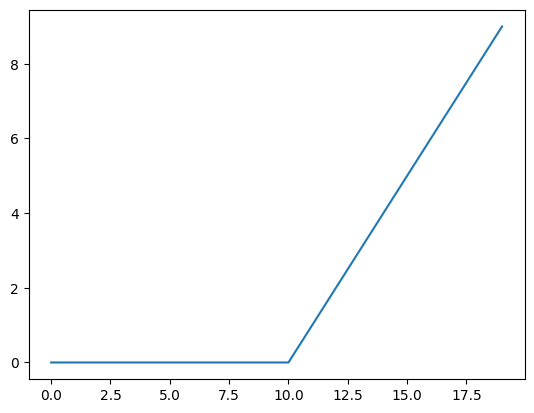

In [599]:
plt.plot(torch.relu(A))

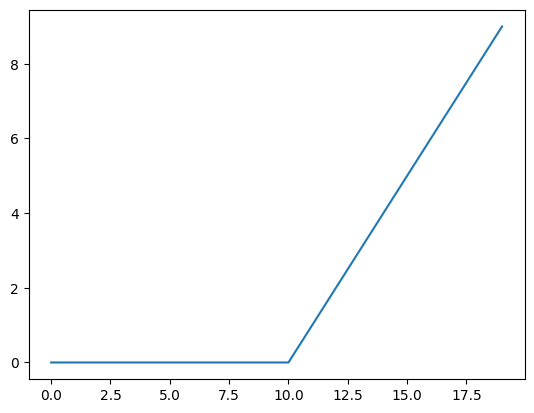

In [600]:
def relu(x: torch.tensor) -> torch.tensor:
    return torch.max(torch.tensor(0), x)

plt.plot(relu(A))

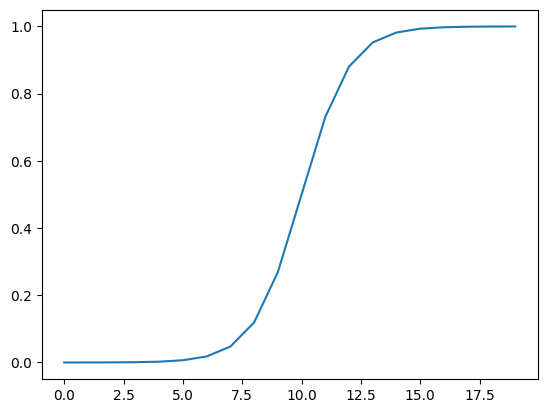

In [601]:
plt.plot(torch.sigmoid(A))

In [602]:
def sigmoid(x):
    return 1 / ( 1 + torch.exp(-A))

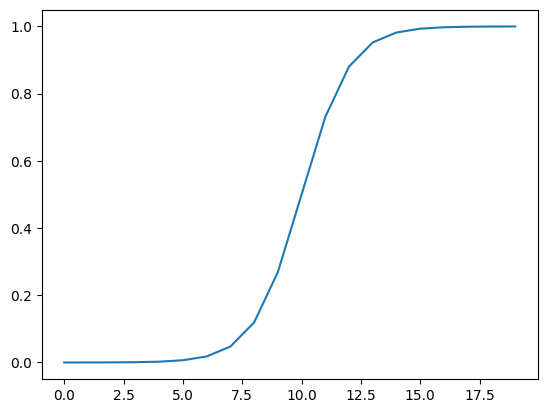

In [603]:
plt.plot(sigmoid(A))

In [604]:
A = torch.tensor([1,1,1,-1]).reshape(2,2).type(dtype=torch.float32)
A_inv = torch.inverse(A)
A_inv

tensor([[ 0.5000,  0.5000],
        [ 0.5000, -0.5000]])

8. Putting it all together with a multi-class classification problem

8.1 Creating a toy multi-class dataset

In [622]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [633]:
# Setting the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Creating the multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, 
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std= 1.5,
                            random_state=RANDOM_SEED)

# 2. Turn the data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Splitting the data into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

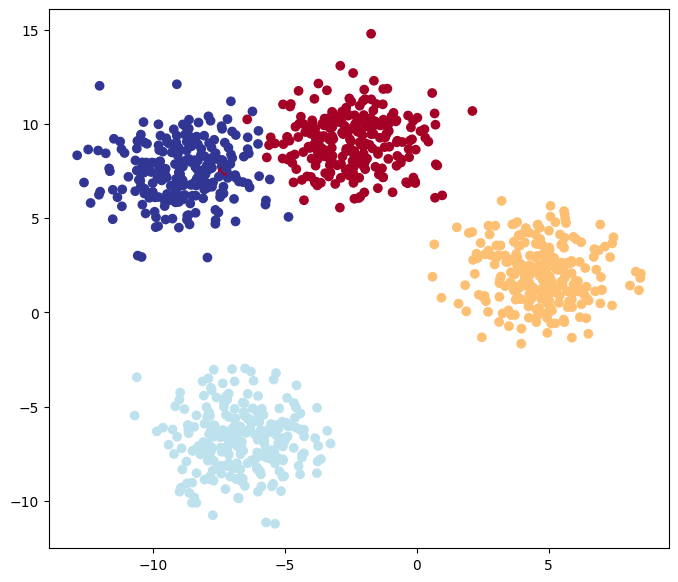

In [634]:
plt.figure(figsize=(8, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)
plt.show()

In [635]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

8.2 Building a multi-class classification model

In [636]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [637]:
# Uniques features of the y (labels)
print(len(torch.unique(y_blob_train)))

4


In [638]:
import torch.nn as nn

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes the multi-class classification model

        Args:
            input_features (int): Number of input features in the model
            output_features (int): Number of outputs features (number of output classes)
            hidden_units (int, optional): Number of hidden units between layers. Defaults to 8.
        
        Returns:
        
        Example:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
        
    def forward(self, x):
        return self.linear_layer_stack(x)

In [639]:
# Creating the instance of the BlobModel and send it target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8
                    ).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

8.3 Creating loss function and optimizer for multi-class classification model

In [640]:
# Creating the loss fn and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(
                            params=model_4.parameters(),
                            lr=0.1
                            )

In [641]:
# Putting all the training and testing tensor into same device "cuda"
X_blob_train = X_blob_train.to(device)
X_blob_test = X_blob_test.to(device)

y_blob_train = y_blob_train.to(device)
y_blob_test = y_blob_test.to(device)

In [642]:
# Testing if the model is working or not with initial prediction without training

model_4.eval()

with torch.inference_mode():
    y_logits = model_4(X_blob_test)

y_logits[:5]

tensor([[ 0.7111, -0.5330,  0.3307, -0.2327],
        [-0.3420, -1.7850, -0.3224, -1.1384],
        [ 0.1878, -0.8563,  0.3375, -0.9026],
        [ 0.4513, -0.4277,  0.2498, -0.1940],
        [ 0.8922, -0.9492,  0.3245, -0.5287]], device='cuda:0')

In [643]:
# Converting model's logits output to prediciton predictions
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.7111, -0.5330,  0.3307, -0.2327],
        [-0.3420, -1.7850, -0.3224, -1.1384],
        [ 0.1878, -0.8563,  0.3375, -0.9026],
        [ 0.4513, -0.4277,  0.2498, -0.1940],
        [ 0.8922, -0.9492,  0.3245, -0.5287]], device='cuda:0')
tensor([[0.4236, 0.1221, 0.2895, 0.1648],
        [0.3694, 0.0873, 0.3767, 0.1666],
        [0.3509, 0.1235, 0.4076, 0.1179],
        [0.3627, 0.1506, 0.2965, 0.1902],
        [0.5084, 0.0806, 0.2882, 0.1228]], device='cuda:0')


In [644]:
torch.sum(y_pred_probs[0])

tensor(1.0000, device='cuda:0')

In [645]:
print(torch.max(y_pred_probs[0]))
print(torch.argmax(y_pred_probs[0]))

tensor(0.4236, device='cuda:0')
tensor(0, device='cuda:0')


In [646]:
# Converting our model's predictions probabilities to prediciton labels
y_preds = torch.argmax(y_pred_probs, dim=1)
print(len(y_preds))
print(y_preds)
print(y_preds.shape)

200
tensor([0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2,
        2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,
        2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
        0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
        2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
        2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
        2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0,
        0, 2, 2, 0, 2, 0, 2, 0], device='cuda:0')
torch.Size([200])


In [651]:
print(len(y_blob_test))
print(y_blob_test)
print(y_blob_test.shape)
print(y_blob_test.dtype)

200
tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')
torch.Size([200])
torch.int64


In [648]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epoch_count = []
train_loss_list = []
test_loss_list = []
train_acc = []
test_acc = []

# Setting the number of epochs
epochs = 100

# Training and Testing of the model

for epoch in range(epochs):
    
    ### Training
    model_4.train()
    
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    
    train_loss = loss_fn(y_logits, y_blob_train)
    train_acc = accuracy_fn(y_true=y_blob_train, 
                            y_pred=y_pred)
    
    optimizer.zero_grad()
    train_loss.backward()
    
    optimizer.step()
    
    ### Testing
    model_4.eval()
    with torch.inference_mode():
        y_test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
        
        test_loss = loss_fn(y_test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test,
                                y_pred=test_pred)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc}")
        epoch_count.append(epoch)
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)

Epoch: 0 | Train Loss: 1.37484 | Train Accuracy: 49.38 % | Test Loss: 1.14556 | Test Accuracy: 76.50 %
Epoch: 10 | Train Loss: 0.66512 | Train Accuracy: 72.62 % | Test Loss: 0.55919 | Test Accuracy: 79.50 %
Epoch: 20 | Train Loss: 0.50131 | Train Accuracy: 73.12 % | Test Loss: 0.41657 | Test Accuracy: 79.00 %
Epoch: 30 | Train Loss: 0.40910 | Train Accuracy: 80.75 % | Test Loss: 0.33745 | Test Accuracy: 84.00 %
Epoch: 40 | Train Loss: 0.33915 | Train Accuracy: 87.00 % | Test Loss: 0.27875 | Test Accuracy: 90.00 %
Epoch: 50 | Train Loss: 0.26286 | Train Accuracy: 94.88 % | Test Loss: 0.21292 | Test Accuracy: 97.00 %
Epoch: 60 | Train Loss: 0.16298 | Train Accuracy: 98.38 % | Test Loss: 0.13005 | Test Accuracy: 99.00 %
Epoch: 70 | Train Loss: 0.09657 | Train Accuracy: 98.88 % | Test Loss: 0.07737 | Test Accuracy: 99.00 %
Epoch: 80 | Train Loss: 0.06813 | Train Accuracy: 98.88 % | Test Loss: 0.05467 | Test Accuracy: 99.00 %
Epoch: 90 | Train Loss: 0.05487 | Train Accuracy: 98.88 % | Test 

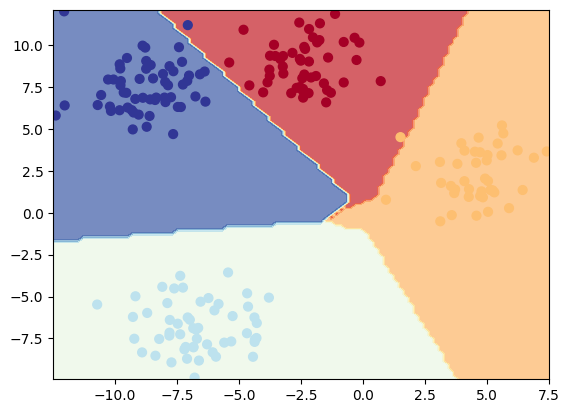

In [649]:
# Plotting the predicitions
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

8.4 Making and evaluating the model's prediciton 

In [660]:
## Make predictions 
model_4.to(device).eval()

with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# Printing out the first 10 predictions
y_logits[:10]

tensor([[ 0.9988,  4.9449, -2.3442, -0.9238],
        [-1.5220, -6.5819, -8.1528,  3.7136],
        [-3.8011, -3.0290,  5.1995, -2.5184],
        [-0.1409,  3.5777, -1.3611, -0.3910],
        [ 6.0244,  2.6601, -5.1481, -1.9724],
        [-2.2247, -8.1695, -9.5303,  4.6788],
        [-3.5962, -2.8465,  4.8426, -2.3268],
        [ 5.0665, -0.2089, -6.0726, -0.7773],
        [-4.3616, -3.6295,  6.2815, -3.1414],
        [ 5.3172,  0.8219, -5.6387, -1.1980]], device='cuda:0')

In [661]:
# Converting the logits to prdiction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.8898e-02, 9.7767e-01, 6.6766e-04, 2.7632e-03],
        [5.2952e-03, 3.3604e-05, 6.9853e-06, 9.9466e-01],
        [1.2323e-04, 2.6672e-04, 9.9917e-01, 4.4439e-04],
        [2.3105e-02, 9.5208e-01, 6.8199e-03, 1.7993e-02],
        [9.6624e-01, 3.3418e-02, 1.3581e-05, 3.2516e-04],
        [1.0033e-03, 2.6281e-06, 6.7393e-07, 9.9899e-01],
        [2.1600e-04, 4.5710e-04, 9.9856e-01, 7.6869e-04],
        [9.9204e-01, 5.0754e-03, 1.4417e-05, 2.8748e-03],
        [2.3862e-05, 4.9617e-05, 9.9985e-01, 8.0838e-05],
        [9.8750e-01, 1.1022e-02, 1.7237e-05, 1.4623e-03]], device='cuda:0')

In [665]:
# Converting the logits to class labels
y_test_labels = torch.argmax(y_pred_probs, dim=1)
y_test_labels[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [663]:
# True class labels (y_blob_test)
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [669]:
print(torch.eq(y_test_labels[:10], y_blob_test[:10]))

tensor([True, True, True, True, True, True, True, True, True, True],
       device='cuda:0')
